In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.dbf
/kaggle/input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shx
/kaggle/input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.cpg
/kaggle/input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp
/kaggle/input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsin

In [73]:
#import pandas as pd
#import geopandas as gpd

from shapely.geometry import LineString

#from learntools.core import binder
#binder.bind(globals())
#from learntools.geospatial.ex2 import *

In [74]:
birds_df = pd.read_csv("../input/geospatial-learn-course-data/purple_martin.csv" , parse_dates=['timestamp'])

In [75]:
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [76]:
birds_df['tag-local-identifier'].unique() #there are 11 different birds since these are uniquely identified by tag-local-identifier

array([30448, 30445, 30384, 30380, 30304, 30198, 30048, 30300, 30054,
       30275, 30263])

In [77]:
import geopandas as gpd

In [78]:

birds = gpd.GeoDataFrame(birds_df , geometry = gpd.points_from_xy(birds_df["location-long"] , birds_df["location-lat"]))

birds.crs = {'init':'epsg:4326'}


In [79]:
# Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))

# Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init' :'epsg:4326'}

In [80]:
world_path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_path)
americas = world.loc[world.continent.isin(['North America','South America'])]


In [81]:
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


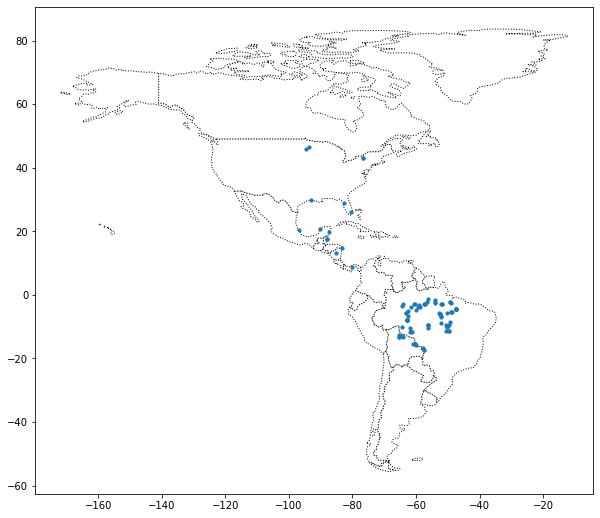

In [82]:
ax=americas.plot(figsize=(10,10),edgecolor='black',color='white',linestyle=':')
birds.plot(ax=ax , markersize=10)

In [83]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


In [84]:
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_df

,tag-local-identifier,geometry
0,30048,"LINESTRING (-90.1299245 20.7324163, -56.293942..."
1,30054,LINESTRING (-93.60860759999998 46.505630200000...
2,30198,"LINESTRING (-80.3103606 25.9254455, -88.146080..."
3,30263,"LINESTRING (-76.78146219999998 42.992085, -62...."
4,30275,"LINESTRING (-76.78213459999998 42.9920688, -60..."
5,30300,"LINESTRING (-94.75309439999999 45.8695781, -50..."
6,30304,"LINESTRING (-92.91446999999999 29.8441347, -63..."
7,30380,"LINESTRING (-82.72467440000001 28.8713041, -83..."
8,30384,"LINESTRING (-87.4677647 19.698833, -49.0815527..."
9,30445,"LINESTRING (-96.82039109999999 20.2975428, -80..."


In [95]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}
end_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)


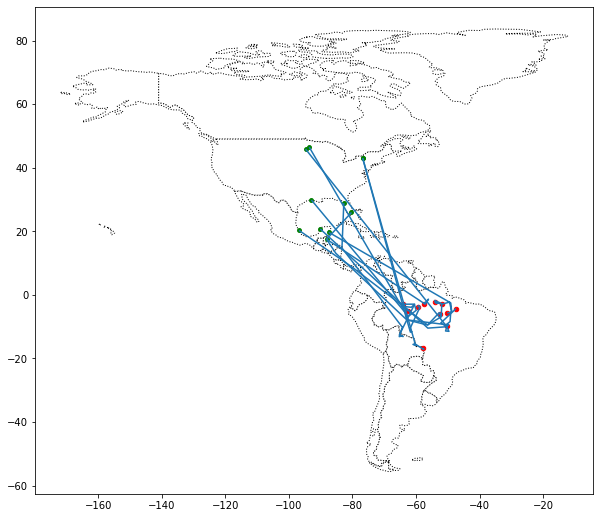

In [96]:
ax=americas.plot(figsize=(10,10),color='white',edgecolor='black',linestyle=':')
path_gdf.plot(ax=ax , markersize = 10)

start_gdf.plot(ax=ax , markersize = 15,color='green')

end_gdf.plot(ax=ax , markersize = 20 , color='red')

In [97]:
protected_filepath = "../input/geospatial-learn-course-data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"
protected_areas = gpd.read_file(protected_filepath)


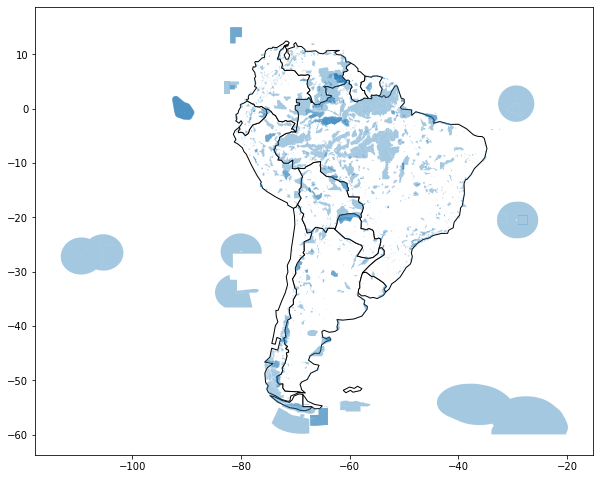

In [101]:
south_america = americas.loc[americas['continent']=='South America']
ax=south_america.plot(figsize=(10,10),color='white',edgecolor='black')
protected_areas.plot(ax=ax , alpha = 0.4 )

Determining the percentage of south america is protected

In [104]:
protected_areas['REP_AREA'] #total area

0          0.700000
1          0.200000
2         34.000000
3       6035.113401
4       4737.960587
           ...     
4743     113.770000
4744      75.000000
4745      33.890000
4746      10.000000
4747    1931.440000
Name: REP_AREA, Length: 4748, dtype: float64

In [106]:
protected_areas['REP_M_AREA'].describe() #marine area

count    4.748000e+03
mean     6.377220e+02
std      1.899131e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.070000e+06
Name: REP_M_AREA, dtype: float64

In [108]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


In [109]:
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


In [111]:
#Total AREA of southamerica
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area)/10**6
#units in square kilometers
#caluculated by summing up the area of each country and converting in square kilomtrs

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [112]:
#    % south america is protected 
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


In [115]:
protected_areas[protected_areas['MARINE']!=2]

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,555624155.0,555624155,1,La Calera,La Calera,Reserva Natural de la Defensa,Nature Reserve of Defense,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Ejercito Argentino,Not Reported,State Verified,1852,AR-X,ARG,ARG,"POLYGON ((-64.40290 -31.35654, -64.40207 -31.3..."
4744,555624161.0,555624161,1,Punta Buenos Aires,Punta Buenos Aires,Reserva Natural de la Defensa,Nature Reserve of Defense,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Armada Argentina,Not Reported,State Verified,1852,AR-U,ARG,ARG,"POLYGON ((-64.10216 -42.25114, -64.10669 -42.2..."
4745,555624160.0,555624160,1,Ascochinga,Ascochinga,Reserva Natural de la Defensa,Nature Reserve of Defense,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Fuerza Áerea Argentina,Not Reported,State Verified,1852,AR-X,ARG,ARG,"MULTIPOLYGON (((-64.25944 -30.96300, -64.25832..."
4746,555624158.0,555624158,1,Baterías - Charles Darwin,Baterías - Charles Darwin,Reserva Natural de la Defensa,Nature Reserve of Defense,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Armada Argentina,Not Reported,State Verified,1852,AR-B,ARG,ARG,"POLYGON ((-61.69538 -38.96695, -61.69749 -38.9..."


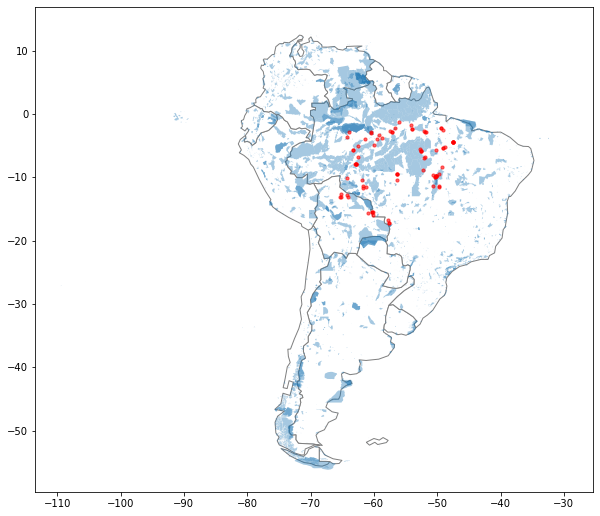

In [113]:
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)